In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from scipy import stats


In [3]:
ih_df = pd.read_csv('./ischemic_heart.csv')
ih_df = ih_df.drop(['id'], axis=1)

original_cols = ih_df.columns

In [4]:
ih_desc = ih_df.describe()
ih_desc.round(2)

,total_cost,age,gender,interventions,drugs,er_visits,complications,comorbidities,duration
count,788.00,788.00,788.00,788.00,788.00,788.00,788.00,788.00,788.00
mean,2799.96,58.72,0.23,4.71,0.45,3.43,0.06,3.77,164.03
std,6690.26,6.75,0.42,5.59,1.06,2.64,0.25,5.95,120.92
min,0.00,24.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,161.12,55.00,0.00,1.00,0.00,2.00,0.00,0.00,41.75
50%,507.20,60.00,0.00,3.00,0.00,3.00,0.00,1.00,165.50
75%,1905.45,64.00,0.00,6.00,0.00,5.00,0.00,5.00,281.00
max,52664.90,70.00,1.00,47.00,9.00,20.00,3.00,60.00,372.00


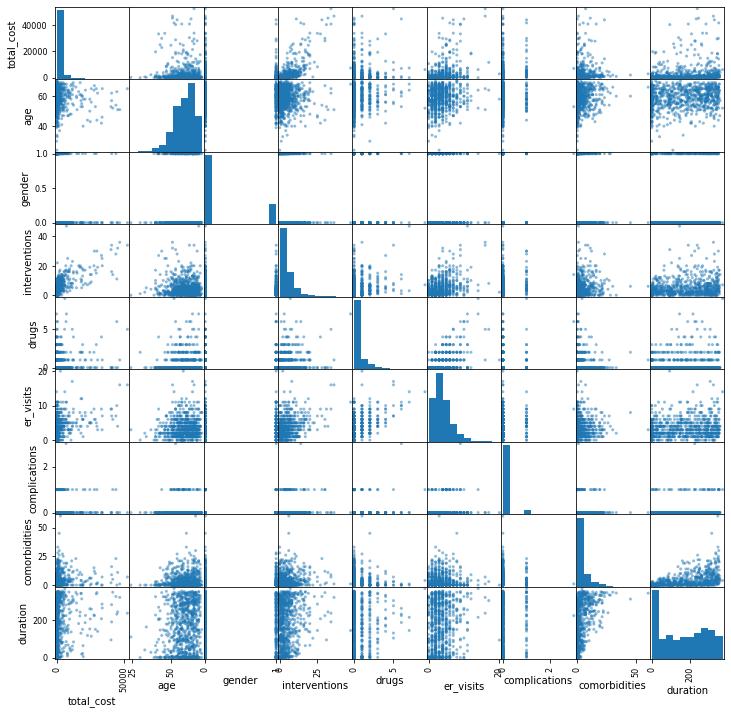

In [5]:
plt.rcParams["figure.figsize"] = (12,12)
pd.plotting.scatter_matrix(ih_df);

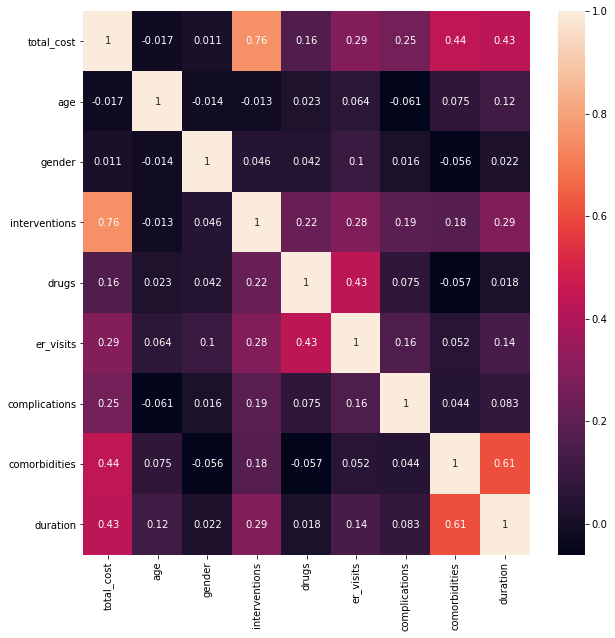

In [7]:
plt.rcParams["figure.figsize"] = (10,10)
corr_mat = ih_df.corr(method='spearman')
sns.heatmap(corr_mat, annot=True)
plt.show()

In [8]:
def normality_output(data):
    ori_shapiro = stats.shapiro(data)
    ori_shapiro_stat = ori_shapiro[0]
    ori_shapiro_p = ori_shapiro[1]
    print("Shapiro Statistic: {:.3f}".format(ori_shapiro_stat))
    if ori_shapiro_p < 0.05:
        print('Data is non-normal with p-value: {:.5f}'.format(ori_shapiro_p))
    else:
        print('Data appears to be normal with p-value: {:.3f}'.format(ori_shapiro_p))
    return ori_shapiro
    
def box_cox_transform_output(data, test_norm_fitted=True):
    fitted_data, fitted_lambda = stats.boxcox(data)
    print("Best fitting lambda: {:.3f}".format(fitted_lambda))
    
    if test_norm_fitted == True:
        print("==================")
        print("Normality on Transformed Data")
        normality_output(fitted_data)
    
    return fitted_data, fitted_lambda


def qq_plot_maker(df, col):

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    prob = stats.probplot(df[col], dist=stats.norm, plot=ax1)
    plt.show()

In [9]:
plt.rcParams["figure.figsize"] = (8,6)

## Total Cost

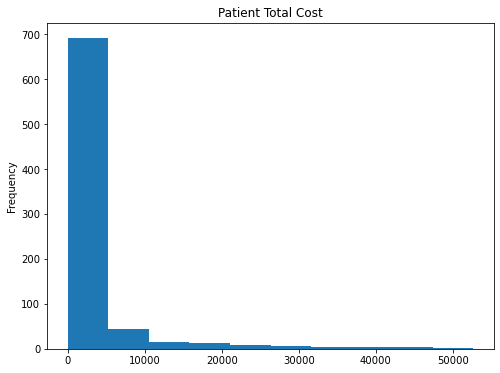

In [18]:
title = 'Patient Total Cost'
col_name = 'total_cost'

ih_df[col_name].plot(kind='hist').set_title(title);

# cumulative_distribution = (ih_df['total_cost'].sort_values().cumsum()/ih_df['total_cost'].sum())
# cumulative_distribution = cumulative_distribution.reset_index(drop=True)
# cumulative_distribution.plot();

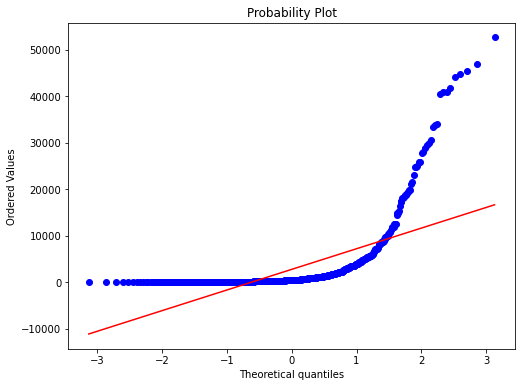

In [19]:
qq_plot_maker(ih_df, col_name)

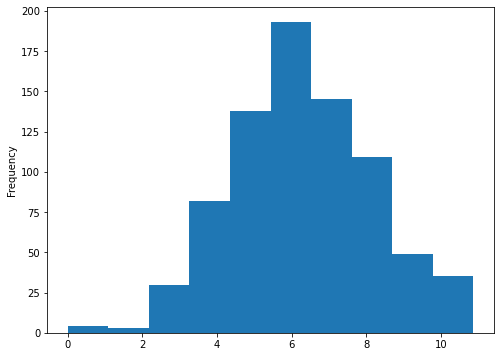

In [20]:
# ih_df['total_cost'].plot(kind='hist').set_title("Patient Cost");

# stats.probplot(ih_df['total_cost'], dist="norm", plot=plt);
np.log(ih_df[col_name]+1).plot(kind='hist');

Patient Total Cost
Patient Total Cost Untransformed
Shapiro Statistic: 0.440
Data is non-normal with p-value: 0.00000
Patient Total Cost Transform
Best fitting lambda: -0.001
Normality on Transformed Data
Shapiro Statistic: 0.995
Data is non-normal with p-value: 0.01516


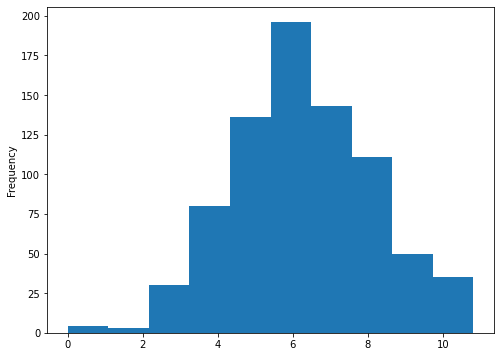

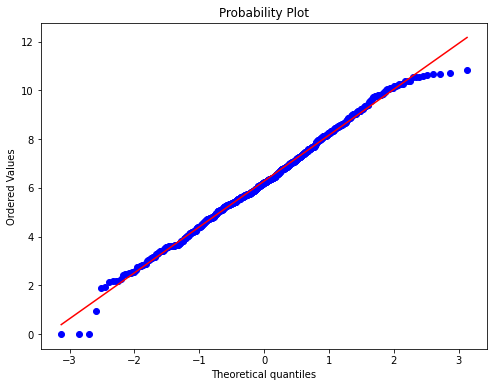

In [21]:

trans_col_name = col_name+'_transform'

print("{}".format(title))
print("==================")
print("{} Untransformed".format(title))
a = normality_output(ih_df[col_name])
print("==================")
print("{} Transform".format(title))

fitted_data, fitted_lambda= box_cox_transform_output(ih_df[col_name]+1)

ih_df.loc[:, trans_col_name] = fitted_data

ih_df.loc[:, trans_col_name].plot(kind='hist')

qq_plot_maker(ih_df, trans_col_name)

## Age

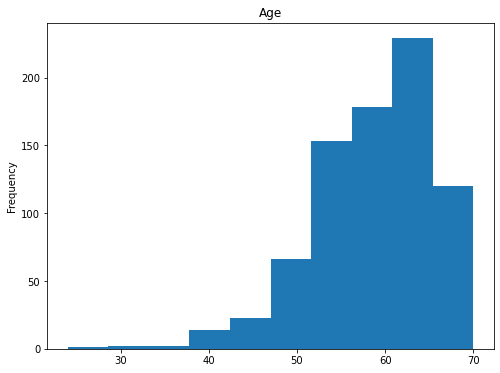

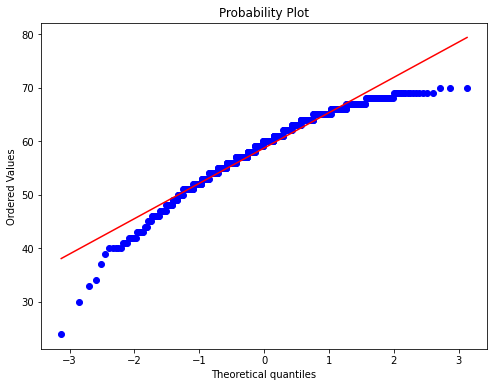

In [22]:
title = 'Age'
col_name = 'age'

ih_df[col_name].plot(kind='hist').set_title(title);

qq_plot_maker(ih_df, col_name)

# cumulative_distribution = (ih_df['total_cost'].sort_values().cumsum()/ih_df['total_cost'].sum())
# cumulative_distribution = cumulative_distribution.reset_index(drop=True)
# cumulative_distribution.plot();

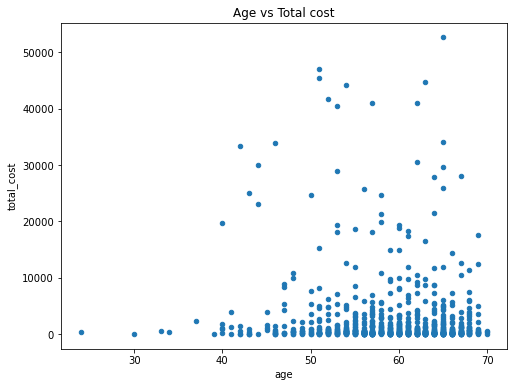

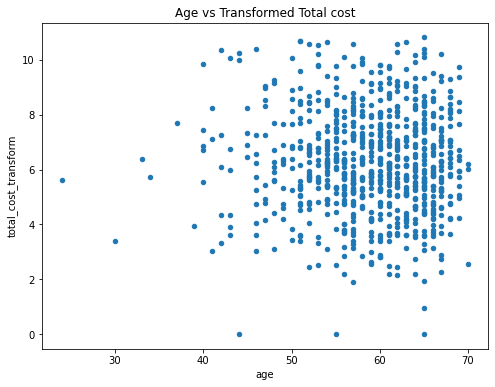

In [23]:
ax = ih_df.plot(kind='scatter', x=col_name, y='total_cost');
ax.set_title('{} vs Total cost'.format(title));

ax = ih_df.plot(kind='scatter', x=col_name, y='total_cost_transform');
ax.set_title('{} vs Transformed Total cost'.format(title));

Age
Age Untransformed
Shapiro Statistic: 0.949
Data is non-normal with p-value: 0.00000
Age Transform
Best fitting lambda: 3.523
Normality on Transformed Data
Shapiro Statistic: 0.985
Data is non-normal with p-value: 0.00000


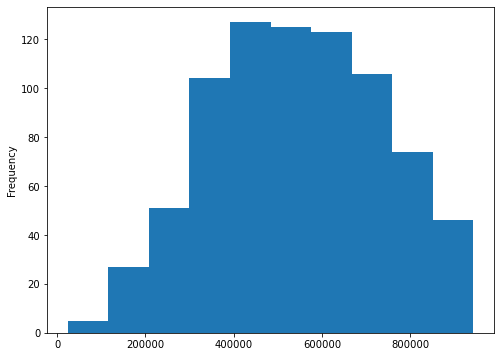

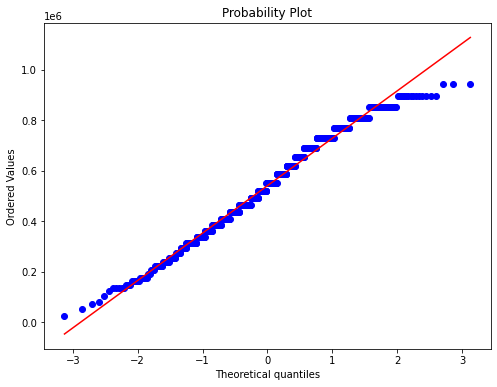

In [24]:

trans_col_name = col_name+'_transform'

print("{}".format(title))
print("==================")
print("{} Untransformed".format(title))
a = normality_output(ih_df[col_name])
print("==================")
print("{} Transform".format(title))

fitted_data, fitted_lambda= box_cox_transform_output(ih_df[col_name]+1)

ih_df.loc[:, trans_col_name] = fitted_data

ih_df.loc[:, trans_col_name].plot(kind='hist')

qq_plot_maker(ih_df, trans_col_name)

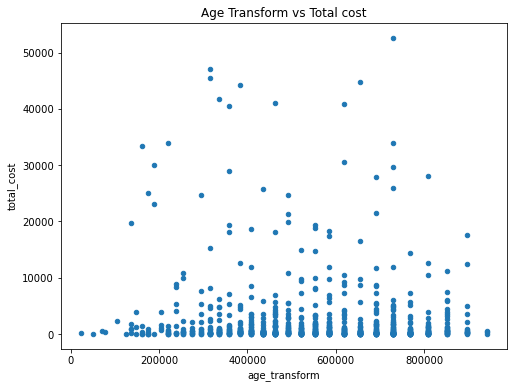

In [25]:
ax = ih_df.plot(kind='scatter', x=trans_col_name, y='total_cost');
ax.set_title('{} vs Total cost'.format(title + ' Transform'));

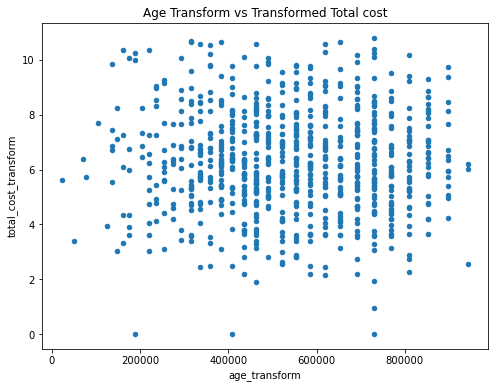

In [26]:
ax = ih_df.plot(kind='scatter', x=trans_col_name, y='total_cost_transform');
ax.set_title('{} vs Transformed Total cost'.format(title + ' Transform'));

## Number of Interventions

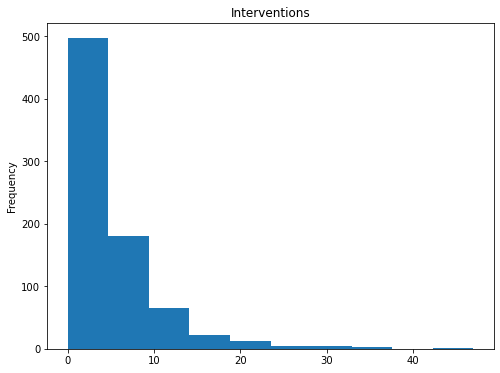

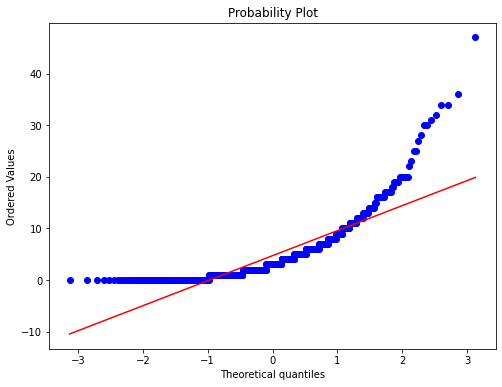

In [34]:
title = 'Interventions'
col_name = 'interventions'

ih_df[col_name].plot(kind='hist').set_title(title);

qq_plot_maker(ih_df, col_name)


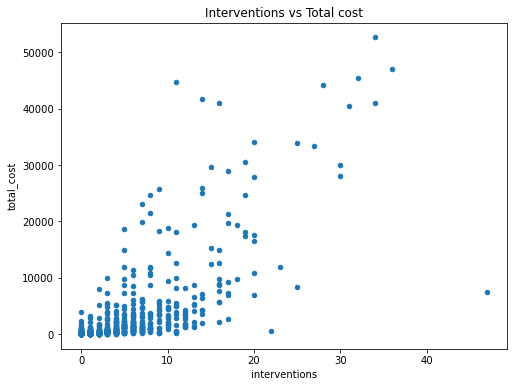

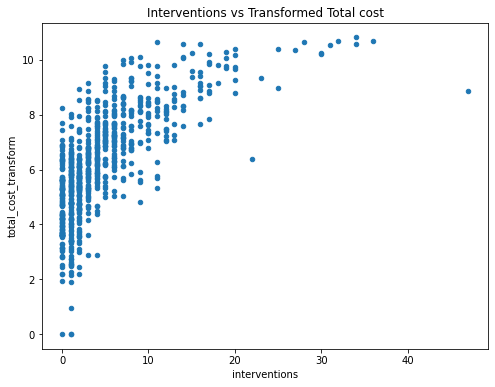

In [35]:
ax = ih_df.plot(kind='scatter', x=col_name, y='total_cost');
ax.set_title('{} vs Total cost'.format(title));

ax = ih_df.plot(kind='scatter', x=col_name, y='total_cost_transform');
ax.set_title('{} vs Transformed Total cost'.format(title));

In [36]:
# possibly quadratic fit?

Interventions
Interventions Untransformed
Shapiro Statistic: 0.749
Data is non-normal with p-value: 0.00000
Interventions Transform
Best fitting lambda: -0.049
Normality on Transformed Data
Shapiro Statistic: 0.957
Data is non-normal with p-value: 0.00000


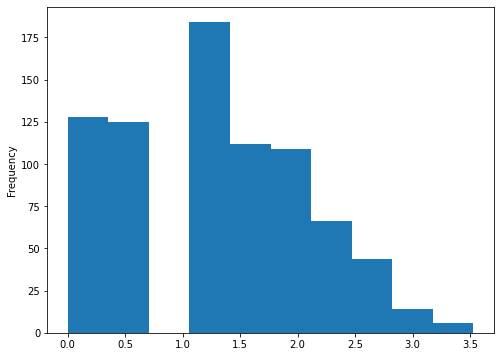

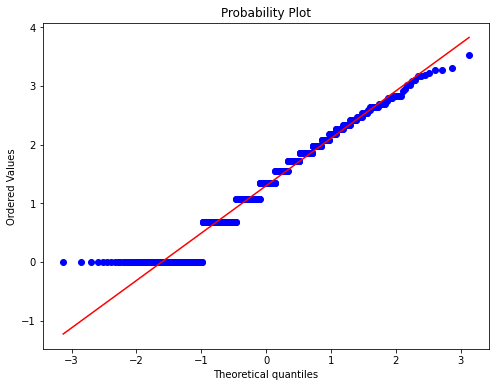

In [37]:

trans_col_name = col_name+'_transform'

print("{}".format(title))
print("==================")
print("{} Untransformed".format(title))
a = normality_output(ih_df[col_name])
print("==================")
print("{} Transform".format(title))

fitted_data, fitted_lambda= box_cox_transform_output(ih_df[col_name]+1)

ih_df.loc[:, trans_col_name] = fitted_data

ih_df.loc[:, trans_col_name].plot(kind='hist')

qq_plot_maker(ih_df, trans_col_name)

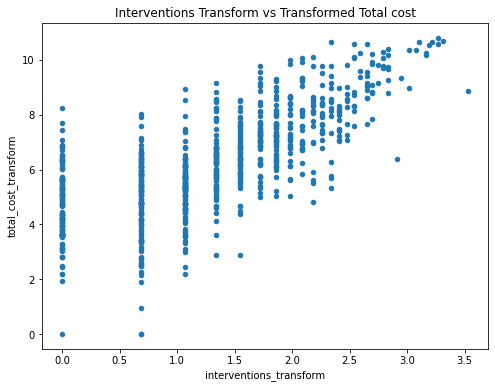

In [38]:
ax = ih_df.plot(kind='scatter', x=trans_col_name, y='total_cost_transform');
ax.set_title('{} Transform vs Transformed Total cost'.format(title));

## Drug Count

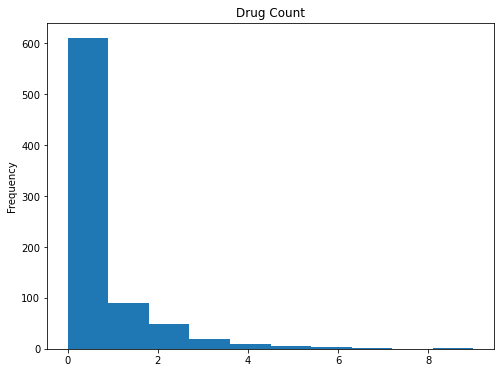

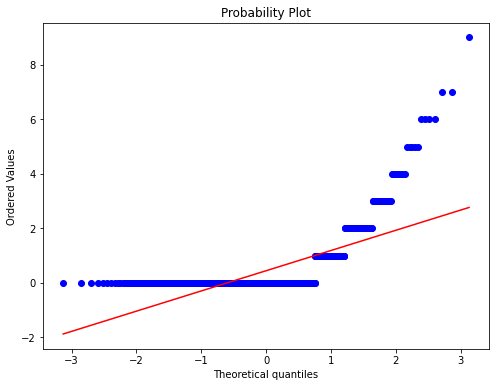

In [46]:
title = 'Drug Count'
col_name = 'drugs'

ih_df[col_name].plot(kind='hist').set_title(title);

qq_plot_maker(ih_df, col_name)


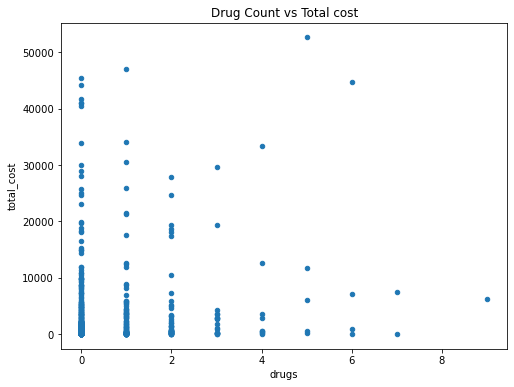

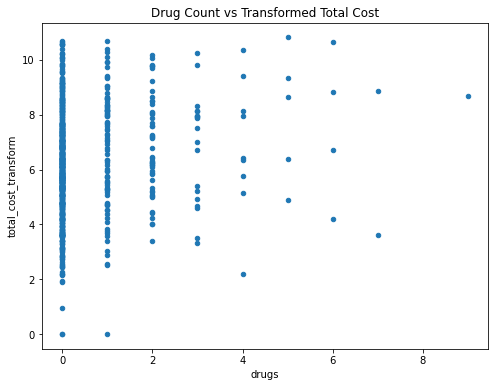

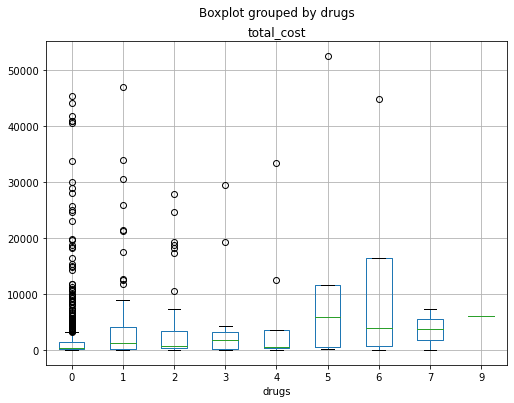

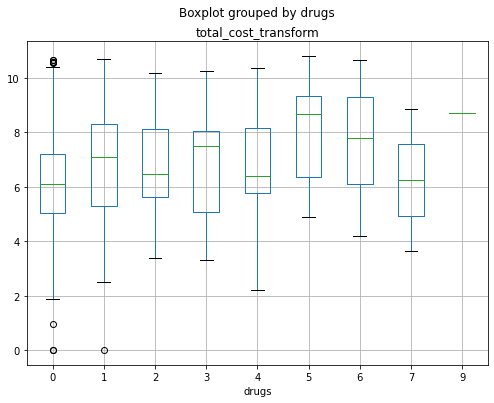

In [51]:
ax = ih_df.plot(kind='scatter', x=col_name, y='total_cost');
ax.set_title('{} vs Total cost'.format(title));

ax = ih_df.plot(kind='scatter', x=col_name, y='total_cost_transform');
ax.set_title('{} vs Transformed Total Cost'.format(title));

ih_df.boxplot('total_cost', by=col_name);

ih_df.boxplot('total_cost_transform', by=col_name)

## ER Visits

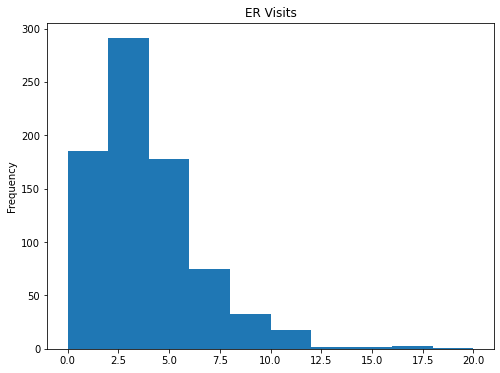

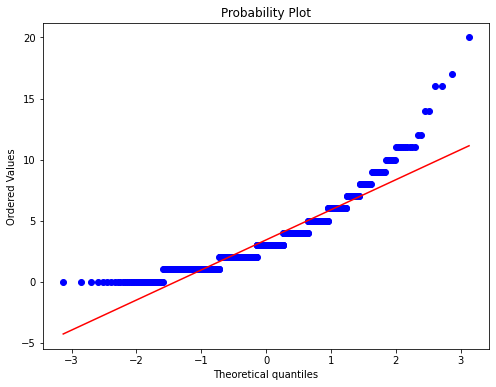

In [52]:
title = 'ER Visits'
col_name = 'er_visits'

ih_df[col_name].plot(kind='hist').set_title(title);

qq_plot_maker(ih_df, col_name)



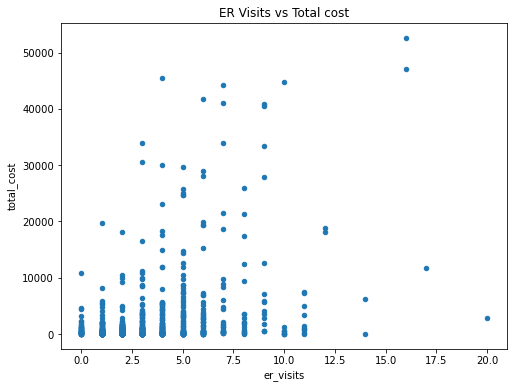

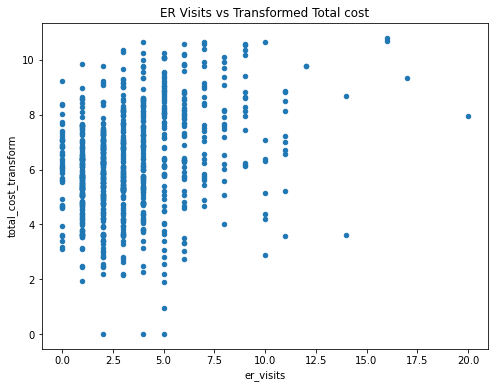

In [53]:
ax = ih_df.plot(kind='scatter', x=col_name, y='total_cost');
ax.set_title('{} vs Total cost'.format(title));

ax = ih_df.plot(kind='scatter', x=col_name, y='total_cost_transform');
ax.set_title('{} vs Transformed Total cost'.format(title));

## Complications

Bin to complications > 0 and complications == 0 for two groups

0    745
1     42
3      1
Name: complications, dtype: int64

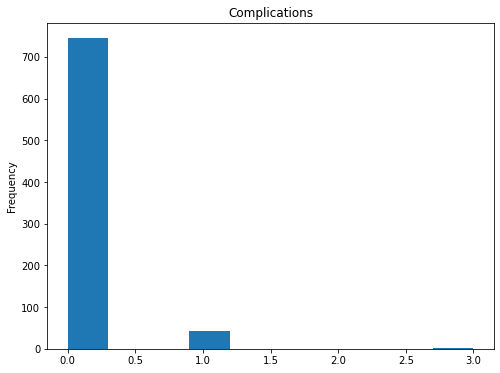

In [54]:
ih_df['complications'].plot(kind='hist').set_title("Complications");
ih_df['complications'].value_counts()

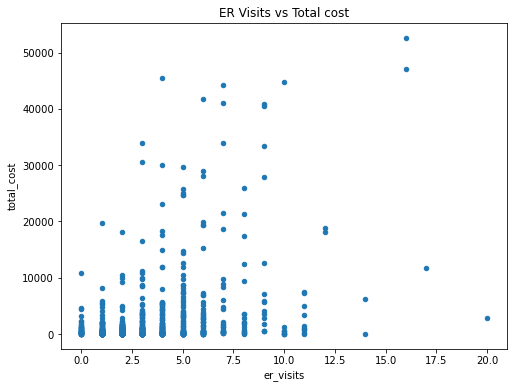

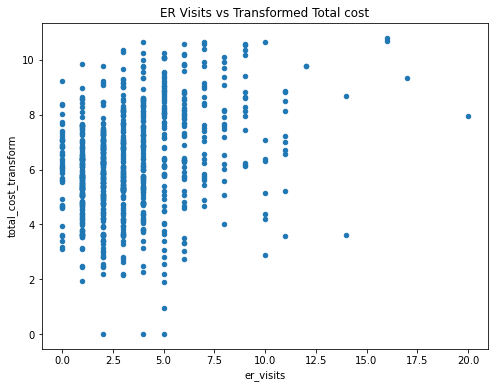

In [55]:
ax = ih_df.plot(kind='scatter', x=col_name, y='total_cost');
ax.set_title('{} vs Total cost'.format(title));

ax = ih_df.plot(kind='scatter', x=col_name, y='total_cost_transform');
ax.set_title('{} vs Transformed Total cost'.format(title));

## Comorbidities

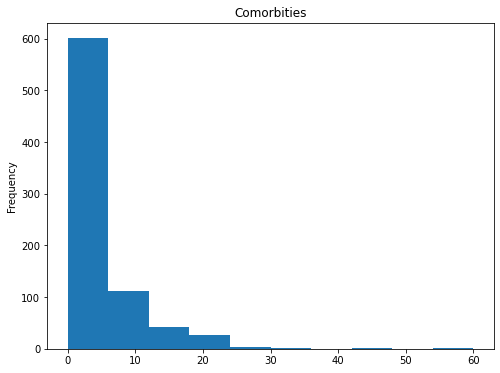

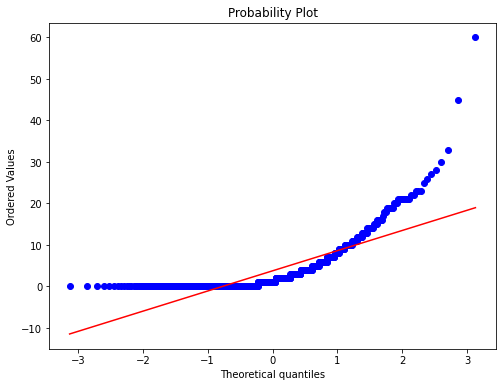

41.1% had 0 comorbidities


In [56]:
title = 'Comorbities'
col_name = 'comorbidities'

ih_df[col_name].plot(kind='hist').set_title(title);

qq_plot_maker(ih_df, col_name)



comorbidty_perc = (ih_df[col_name]==0).sum()/(len(ih_df[col_name]))
print('{:.1%} had 0 comorbidities'.format(comorbidty_perc))



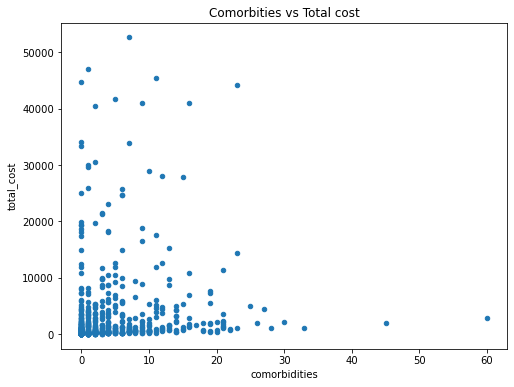

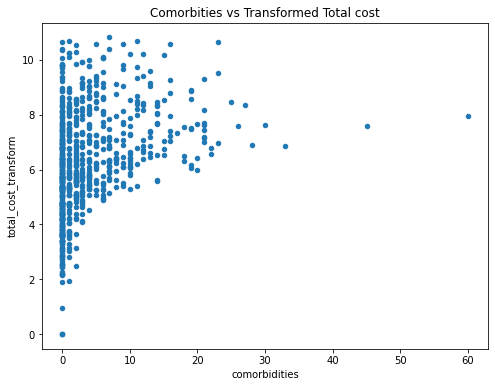

In [57]:
ax = ih_df.plot(kind='scatter', x=col_name, y='total_cost');
ax.set_title('{} vs Total cost'.format(title));

ax = ih_df.plot(kind='scatter', x=col_name, y='total_cost_transform');
ax.set_title('{} vs Transformed Total cost'.format(title));

Outlier alert

In [58]:
ih_df.loc[ih_df['comorbidities']>30]

,total_cost,age,gender,interventions,drugs,er_visits,complications,comorbidities,duration,age_transform,total_cost_transform,interventions_transform
182,2916.8,66,0,6,1,3,0,60,347,768635.648671,7.948955,1.856472
487,2011.6,60,0,6,2,8,0,45,315,552320.255569,7.580243,1.856472
757,980.9,60,0,0,0,2,0,33,348,552320.255569,6.867389,0.000000


## Duration

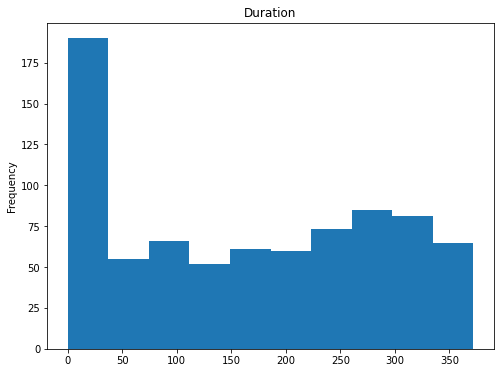

In [59]:
ih_df['duration'].plot(kind='hist').set_title("Duration");

In [60]:
ih_df.columns

Index(['total_cost', 'age', 'gender', 'interventions', 'drugs', 'er_visits',
       'complications', 'comorbidities', 'duration', 'age_transform',
       'total_cost_transform', 'interventions_transform'],
      dtype='object')

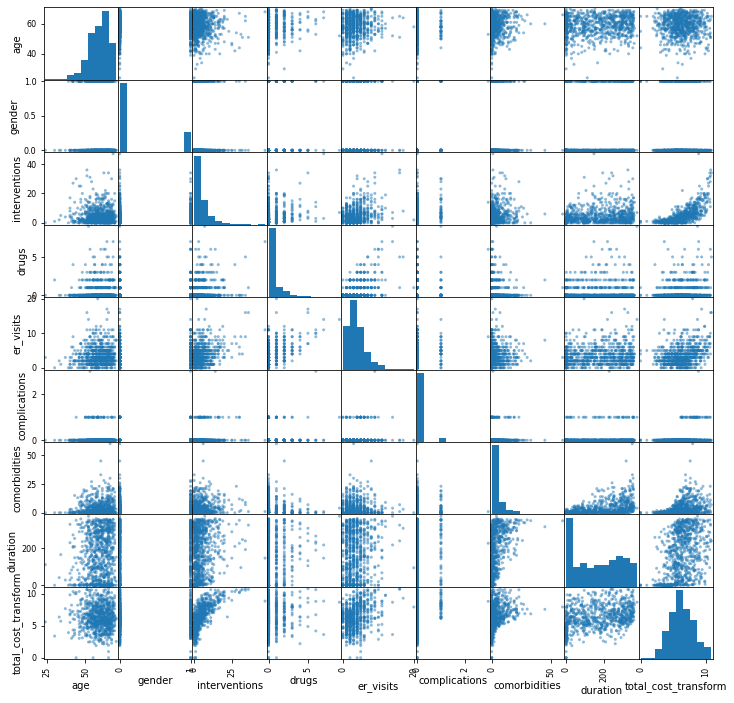

In [61]:
plt.rcParams["figure.figsize"] = (12,12)


pd.plotting.scatter_matrix(ih_df[[ 'age', 'gender', 'interventions', 'drugs', 'er_visits',
       'complications', 'comorbidities', 'duration', 'total_cost_transform']]);

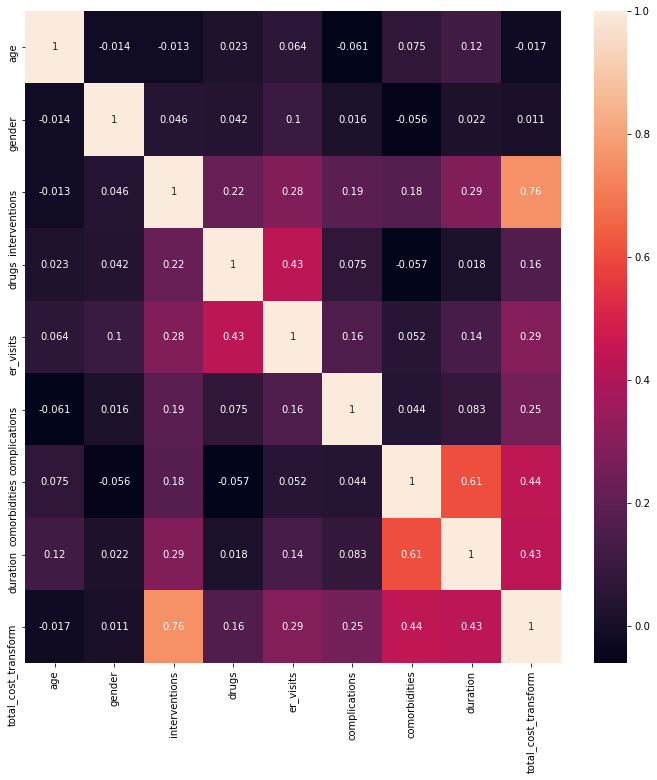

In [62]:
corr_mat = ih_df[[ 'age', 'gender', 'interventions', 'drugs', 'er_visits',
       'complications', 'comorbidities', 'duration', 'total_cost_transform']].corr(method='spearman')
sns.heatmap(corr_mat, annot=True)
plt.show()

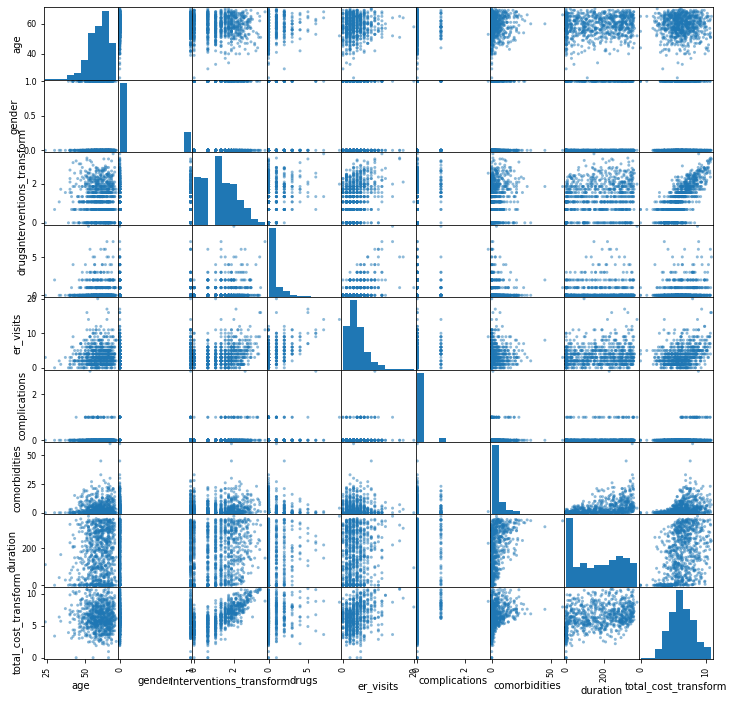

In [63]:
pd.plotting.scatter_matrix(ih_df[[ 'age', 'gender', 'interventions_transform', 'drugs', 'er_visits',
       'complications', 'comorbidities', 'duration', 'total_cost_transform']]);

### Preliminary model

In [74]:
from statsmodels.formula.api import ols


In [143]:
ori_ih_df = ih_df[original_cols]

fit = ols('total_cost ~ age + gender + interventions + drugs + er_visits + complications + comorbidities + duration', 
            data=ih_df).fit()

print(fit.summary())



                            OLS Regression Results                            
Dep. Variable:             total_cost   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     120.3
Date:                Tue, 13 Apr 2021   Prob (F-statistic):          1.43e-130
Time:                        16:54:28   Log-Likelihood:                -7741.7
No. Observations:                 788   AIC:                         1.550e+04
Df Residuals:                     779   BIC:                         1.554e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       653.8336   1422.214      0.460

,total_cost,age,gender,interventions,drugs,er_visits,complications,comorbidities,duration,total_cost_transform,age_transform,interventions_transform,comorbidities_transform,residuals,yhat
0,179.1,63,0,2,1,4,0,3,300,5.180947,654091.270155,1.069714,1.079644,-305.680131,484.780131
1,319.0,59,0,2,0,6,0,0,120,5.752823,521078.857184,1.069714,0.000000,-1547.281623,1866.281623
2,9310.7,62,0,17,0,2,0,5,353,9.100164,618793.257247,2.695992,1.302570,-2810.433370,12121.133370
3,280.9,60,1,9,0,7,0,2,332,5.626727,552320.255569,2.178066,0.899481,-6600.193246,6881.093246
4,18727.1,55,0,5,2,7,0,0,18,9.792758,408652.354145,1.715743,0.000000,14500.499219,4226.600781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,2061.7,62,0,9,0,1,1,0,40,7.604657,618793.257247,2.178066,0.000000,-4083.772559,6145.472559
784,1137.5,67,1,9,0,11,0,3,67,7.014407,809814.459195,2.178066,1.079644,-7346.752615,8484.252615
785,2677.7,68,0,3,2,6,0,10,303,7.864087,852549.575694,1.340492,1.578291,793.340337,1884.359663
786,1282.2,58,0,7,2,2,0,7,244,7.133263,491123.722728,1.977525,1.441295,-2482.420897,3764.620897


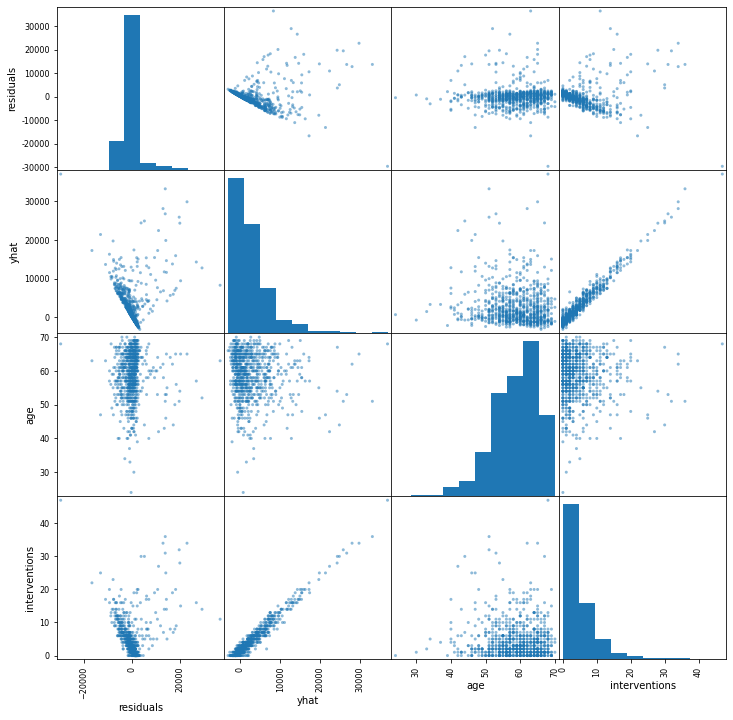

In [156]:
residuals = fit.resid
yhat = fit.predict()

ih_df['resid'] = fit.resid
ih_df['sq_res'] = fit.resid**2

ih_df['yhat'] = fit.predict()

pd.plotting.scatter_matrix(ih_df[['residuals', 'yhat', 'age', 'interventions']]);

ih_df

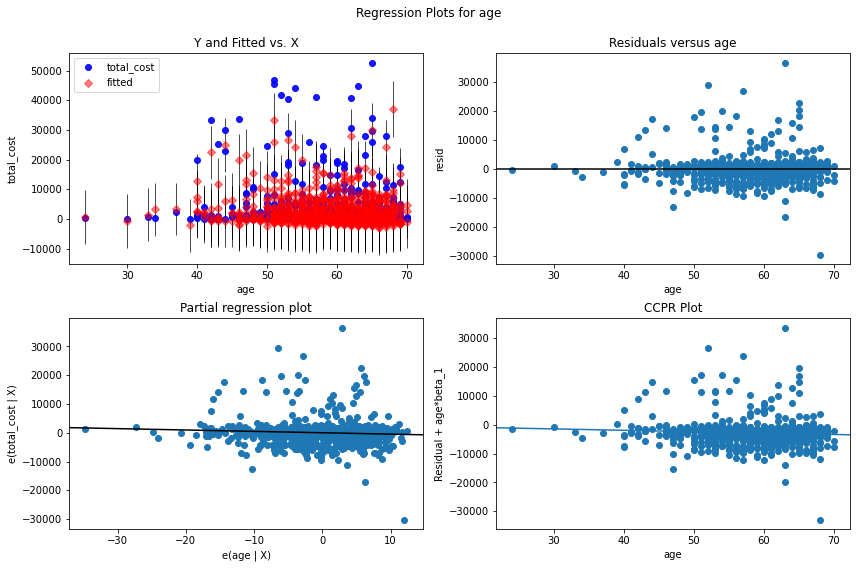

In [139]:

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(fit, 'age', fig=fig)

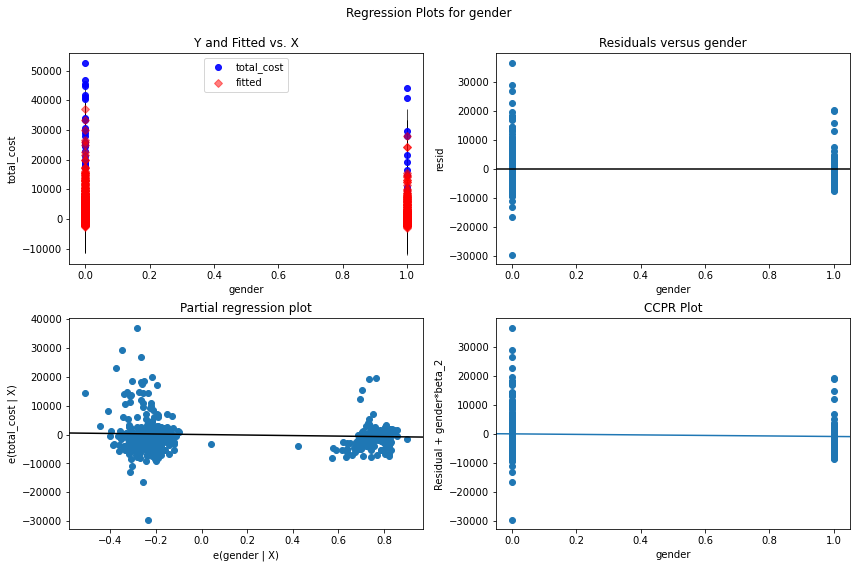

In [140]:

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'gender', fig=fig)

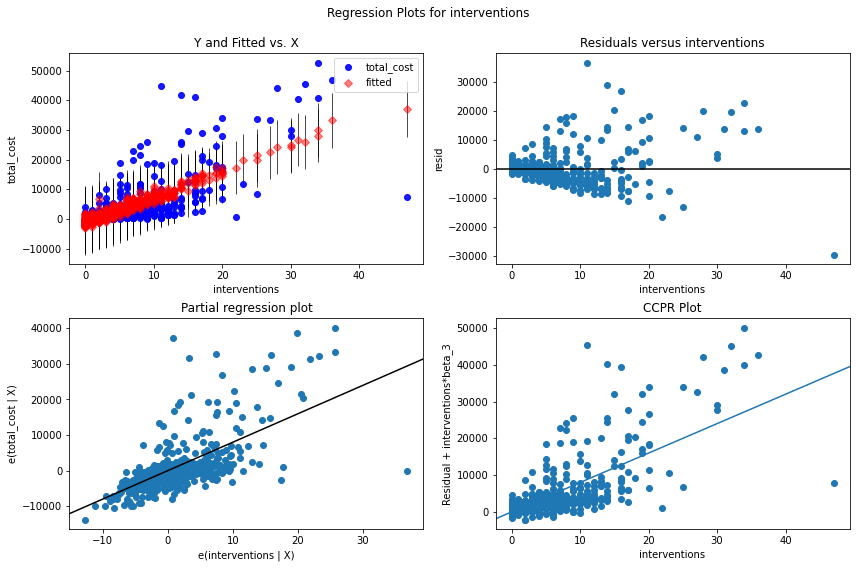

In [141]:

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'interventions', fig=fig)